In [1]:
import numpy as np
import numpy.linalg as la

In [15]:
# 17b.4
U = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 0]])
Sigma = np.array([[6, 0, 0, 0],
                  [0, 5, 0, 0],
                  [0, 0, 4, 0],
                  [0, 0, 0, 0]])
VT = np.array([[-0.02, -0.19, 0.18, 0.96],
               [-0.86, -0.42, -0.28, -0.05],
               [0.23, 0.13, -0.94, 0.21],
               [0.45, -0.88, -0.05, -0.16]])
b = np.array([8, 3, 5, 5, 1])
Sigma_p = 1 / Sigma.T
Sigma_p[Sigma_p == np.inf] = 0
x = VT.T @ Sigma_p @ U.T @ b
x

<ipython-input-15-285e9836113c>:16: RuntimeWarning: divide by zero encountered in true_divide
  Sigma_p = 1 / Sigma.T


array([-0.41666667, -0.31833333, -2.01      ,  1.17      ])

In [9]:
# 17b.5
U = np.array([[1, 0, 0],
              [0, -1/np.sqrt(2), 1/np.sqrt(2)],
              [0, 1/np.sqrt(2), 1/np.sqrt(2)]])
Sigma = np.array([[9, 0, 0],
                  [0, 4, 0],
                  [0, 0, 0]])
VT = np.array([[-np.sqrt(3)/2, 1/2, 0],
               [-1/2, -np.sqrt(3)/2, 0],
               [0, 0, 1]])
b = np.array([7, 0, 0])
Sigma_p = 1 / Sigma.T
Sigma_p[Sigma_p == np.inf] = 0
x = VT.T @ Sigma_p @ U.T @ b
x

<ipython-input-9-feedfaf5abde>:11: RuntimeWarning: divide by zero encountered in true_divide
  Sigma_p = 1 / Sigma.T


array([-0.67357531,  0.38888889,  0.        ])

In [13]:
# 17b.6
U = np.array([[1/np.sqrt(2), -1/np.sqrt(2), 0, 0],
              [1/np.sqrt(2), 1/np.sqrt(2), 0, 0],
              [0, 0, 0, 1],
              [0, 0, 1, 0]])
b = np.array([3, 10, 12, 2])
r = 2
z = U.T @ b
la.norm(z[r:], 2)

12.165525060596439

No handles with labels found to put in legend.


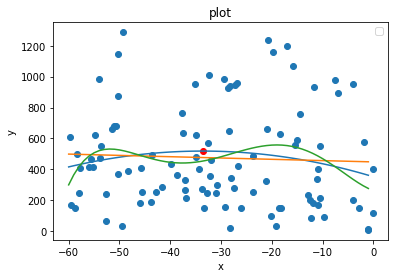

In [28]:
# 17b.7
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def lst_sq(A, b):
    """
    Solve the least square equation using SVD
    """
    # Your code here
    x = la.inv(A.T@A)@A.T@b
    return x

Q = np.vstack([times**2, times, np.ones(len(times))]).T
q_coeffs = lst_sq(Q, prices)

t = -q_coeffs[1]/2/q_coeffs[0]
if t>=0:
    best_time = 0
else:
    best_time = t

L = np.vstack([times, np.ones(len(times))]).T
l_coeffs = lst_sq(L, prices)
M = np.vstack([times**i for i in range(5,-1,-1)]).T
m_coeffs = lst_sq(M, prices)

plt.scatter(times, prices)
plt.scatter(best_time, q_coeffs@np.array([best_time**2, best_time, 1]), color = 'r')
ts = np.arange(-60,0,1)
plt.plot(ts, np.vstack([ts**2, ts, np.ones(len(ts))]).T@q_coeffs)
plt.plot(ts, np.vstack([ts, np.ones(len(ts))]).T@l_coeffs)
plt.plot(ts, np.vstack([ts**i for i in range(5,-1,-1)]).T@m_coeffs)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('plot')
price_plot = plt.gca()